# dFBA using reframed

In [222]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../functions/")

In [223]:
import dfba_ode

import kinetic_law_specific
import reframed
from reframed import Environment

from collections import OrderedDict
import matplotlib.pyplot as plt

In [224]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Our system

In [253]:
model = reframed.load_cbmodel("../models/RcH10_final2.xml")
model.reactions.R_EX_gal_e.ub=0
model.reactions.R_EX_rib__D_e.ub=0
model.add_ratio_constraint("R_EX_h2_e","R_EX_cellb_e",-4)
model.add_ratio_constraint("R_EX_ac_e","R_EX_etoh_e",round(47.7/44.8,2)) # The closest ethanol and acetate are to each other https://www.microbiologyresearch.org/content/journal/micro/10.1099/00221287-147-6-1461
model.add_ratio_constraint("R_EX_ac_e","R_EX_lac__L_e",round(47.7/7.5,2)) # The closest ethanol and acetate are to each other https://www.microbiologyresearch.org/content/journal/micro/10.1099/00221287-147-6-1461

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()

env_cellb = Environment.from_compounds(media['DM_cellobiose'], max_uptake=1000)
env_cellb['R_EX_h2o_e'] = (-1000,1000)
env_cellb.apply(model,warning=False)

env = env_cellb.copy()


C = OrderedDict()

C["R_EX_cellulose_e"] = 38.53897
C["R_EX_cellb_e"] = 0
C["R_EX_glc__D_e"] = 0

C["R_EX_ac_e"] = 0
C["R_EX_lac__L_e"] = 0
C["R_EX_etoh_e"] = 0
C["R_EX_pyr_e"] = 0
C["R_EX_h2_e"] = 0
C["R_EX_co2_e"] = 0
C["Growth"] = 0.02

from dfba_ode import glucose_kinetics,cellobiose_kinetics,cellulase_kinetics,KineticLaw

kinetic_laws = {}
kinetic_laws["R_EX_glc__D_e"] = KineticLaw("R_EX_glc__D_e",kinetic_law_func=glucose_kinetics,vmax=6.01,Km=0.2)
kinetic_laws["R_EX_cellb_e"] = KineticLaw("R_EX_cellb_e",kinetic_law_func=cellobiose_kinetics,vmax=5.01,Km=0.2)
kinetic_laws["R_EX_cellulose_e"] = KineticLaw(met="R_EX_cellulose_e",kinetic_law_func=cellulase_kinetics,vmax=2.9,Km=4.4,Ki=11)
external_rxns_fluxes ={"R_EX_cellulose_e":dfba_ode.cellulase_flux}
 

In [252]:
ts = np.linspace(0, 150, 1000)  # Desired integration resolution and interval
y0 = np.array(list(C.values()))

with tqdm() as pbar:
    
    dynamic_system = dfba_ode.flux_predictions
    dynamic_system.pbar = pbar
    
    
    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-4,
        atol=1e-4,
        #max_step = 0.1,
        method='RK23',
        args=(C.keys(),
        model,
        kinetic_laws,
        env,"Growth",external_rxns_fluxes)
    )

t = 150.000: : 9284it [02:52, 53.77it/s]


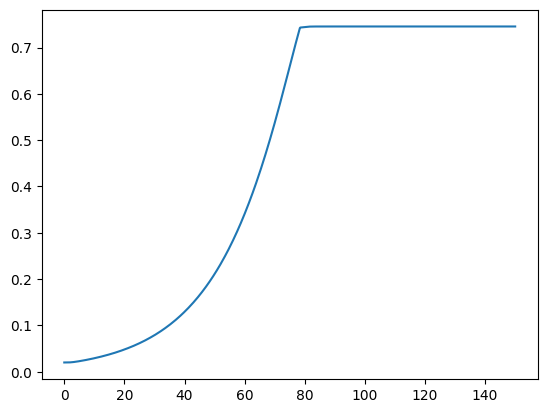

In [73]:

plt.plot(sol.t, sol.y.T[:, -1])

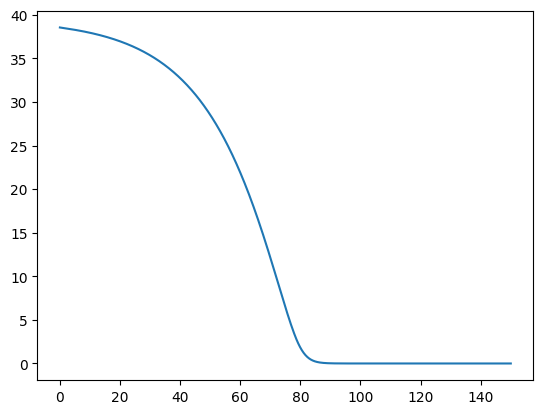

In [74]:
plt.plot(sol.t, sol.y.T[:, 0])

(0.0, 1.5)

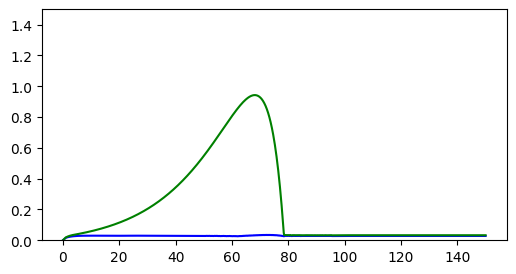

In [75]:
fig, ax =plt.subplots(figsize=[6,3])
ax.plot(sol.t, sol.y.T[:, 2],color="b")
ax.plot(sol.t, sol.y.T[:, 1],color="g")
ax.set_ylim([0,1.5])

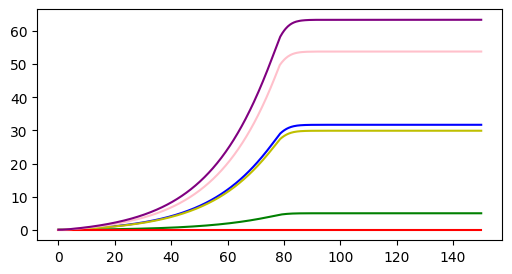

In [76]:
fig, ax =plt.subplots(figsize=[6,3])
ax.plot(sol.t, sol.y.T[:, 3],color="b")
ax.plot(sol.t, sol.y.T[:, 4],color="g")
ax.plot(sol.t, sol.y.T[:, 5],color="y")
ax.plot(sol.t, sol.y.T[:, 6],color="r")
ax.plot(sol.t, sol.y.T[:, 7],color="pink")
ax.plot(sol.t, sol.y.T[:, 8],color="purple")
#ax.set_ylim([0,])

### Our system with a model that doesn't work

In [474]:
model = reframed.load_cbmodel("../models/RcH10_final2.xml")
model.reactions.R_EX_gal_e.ub=0
model.reactions.R_EX_rib__D_e.ub=0
model.add_ratio_constraint("R_EX_h2_e","R_EX_cellb_e",-4)
model.add_ratio_constraint("R_EX_ac_e","R_EX_etoh_e",round(47.7/44.8,2)) # The closest ethanol and acetate are to each other https://www.microbiologyresearch.org/content/journal/micro/10.1099/00221287-147-6-1461
model.add_ratio_constraint("R_EX_ac_e","R_EX_lac__L_e",round(47.7/7.5,2)) # The closest ethanol and acetate are to each other https://www.microbiologyresearch.org/content/journal/micro/10.1099/00221287-147-6-1461

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()

env_cellb = Environment.from_compounds(media['DM_cellobiose'], max_uptake=1000)
env_cellb['R_EX_h2o_e'] = (0,0)
env_cellb['R_EX_h_e'] = (0,0)
env_cellb['R_EX_so4_e'] = (0,0)
env_cellb['R_EX_pnto__R_e'] = (0,0)

env_cellb.apply(model,warning=False)

env = env_cellb.copy()


C = OrderedDict()

C["R_EX_cellulose_e"] = 38.53897
C["R_EX_cellb_e"] = 0
C["R_EX_glc__D_e"] = 0

C["R_EX_ac_e"] = 0
C["R_EX_lac__L_e"] = 0
C["R_EX_etoh_e"] = 0
C["R_EX_pyr_e"] = 0
C["R_EX_h2_e"] = 0
C["R_EX_co2_e"] = 0
C["Growth"] = 0.02

from dfba_ode import glucose_kinetics,cellobiose_kinetics,cellulase_kinetics,KineticLaw

kinetic_laws = {}
kinetic_laws["R_EX_glc__D_e"] = KineticLaw("R_EX_glc__D_e",kinetic_law_func=glucose_kinetics,vmax=6.01,Km=0.2)
kinetic_laws["R_EX_cellb_e"] = KineticLaw("R_EX_cellb_e",kinetic_law_func=cellobiose_kinetics,vmax=5.01,Km=0.2)
kinetic_laws["R_EX_cellulose_e"] = KineticLaw(met="R_EX_cellulose_e",kinetic_law_func=cellulase_kinetics,vmax=2.9,Km=4.4,Ki=11)
external_rxns_fluxes ={"R_EX_cellulose_e":dfba_ode.cellulase_flux}
 

In [475]:
ts = np.linspace(0, 1200, 1000)  # Desired integration resolution and interval
y0 = np.array(list(C.values()))

with tqdm() as pbar:
    
    dynamic_system = dfba_ode.flux_predictions
    dynamic_system.pbar = pbar
    
    
    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-4,
        atol=1e-4,
        #max_step = 0.1,
        method='RK23',
        args=(C.keys(),
        model,
        kinetic_laws,
        env,"Growth",external_rxns_fluxes)
    )

t = 1200.000: : 53it [00:00, 61.10it/s]


In [476]:
C_dict = dict(zip(C.keys(),sol.y))

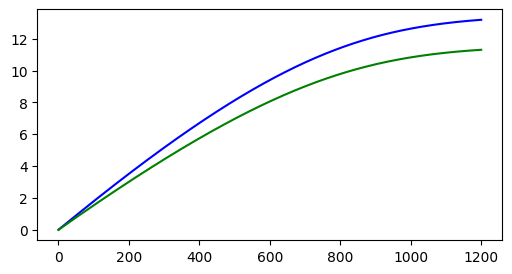

In [478]:

fig, ax =plt.subplots(figsize=[6,3])
ax.plot(sol.t, C_dict["R_EX_cellb_e"],color="b")
ax.plot(sol.t, C_dict["R_EX_glc__D_e"],color="g")


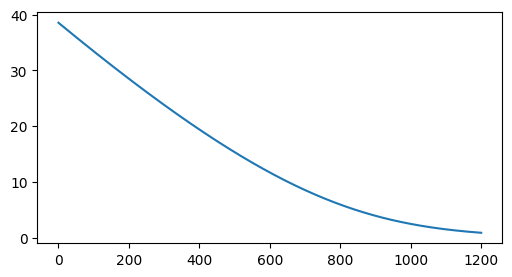

In [480]:

fig, ax =plt.subplots(figsize=[6,3])
ax.plot(sol.t, C_dict["R_EX_cellulose_e"])



### Model with no constraints and cellulose with rapid conversion to glucose

In [368]:
C = OrderedDict()
C["R_EX_cellulose_e"] =10
C["R_EX_cellb_e"] =0
C["R_EX_glc__D_e"] = 0

C["R_EX_ac_e"] = 0
C["R_EX_lac__L_e"] = 0
C["R_EX_etoh_e"] = 0
C["R_EX_pyr_e"] = 0
C["R_EX_h2_e"] = 0
C["R_EX_co2_e"] = 0
C["Growth"] = 0.02

from dfba_ode import glucose_kinetics,cellobiose_kinetics,cellulase_kinetics,KineticLaw

kinetic_laws = {}
kinetic_laws["R_EX_glc__D_e"] = KineticLaw("R_EX_glc__D_e",kinetic_law_func=glucose_kinetics,vmax=6.01,Km=0.2)
kinetic_laws["R_EX_cellb_e"] = KineticLaw("R_EX_cellb_e",kinetic_law_func=cellobiose_kinetics,vmax=5.01,Km=0.2)
kinetic_laws["R_EX_cellulose_e"] = KineticLaw(met="R_EX_cellulose_e",kinetic_law_func=cellulase_kinetics,vmax=1000,Km=0.00001,Ki=100000)

external_rxns_fluxes ={}



def cellulase_flux(fluxes,bounds,rxn):
    cellulase =bounds[rxn]
    pfba_glc = fluxes["R_EX_glc__D_e"]
    fluxes["R_EX_glc__D_e"] = pfba_glc - cellulase
    fluxes[rxn]=cellulase
    return fluxes

external_rxns_fluxes ={"R_EX_cellulose_e":cellulase_flux}


In [369]:
ts = np.linspace(0, 150, 1000)  # Desired integration resolution and interval
y0 = np.array(list(C.values()))

with tqdm() as pbar:
    
    dynamic_system = dfba_ode.flux_predictions
    dynamic_system.pbar = pbar
    
    
    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-4,
        atol=1e-4,
        #max_step = 0.1,
        method='RK23',
        args=(C.keys(),
        model,
        kinetic_laws,
        env,"Growth",external_rxns_fluxes)
    )

t = 150.000: : 218it [00:04, 43.60it/s]


In [370]:
C_dict = dict(zip(C.keys(),sol.y))


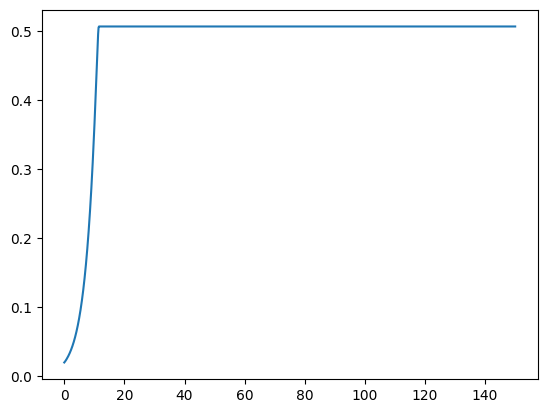

In [371]:
plt.plot(sol.t, C_dict["Growth"])

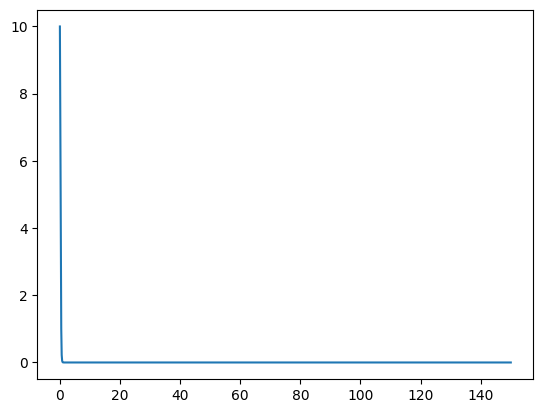

In [372]:
plt.plot(sol.t, C_dict["R_EX_cellulose_e"])

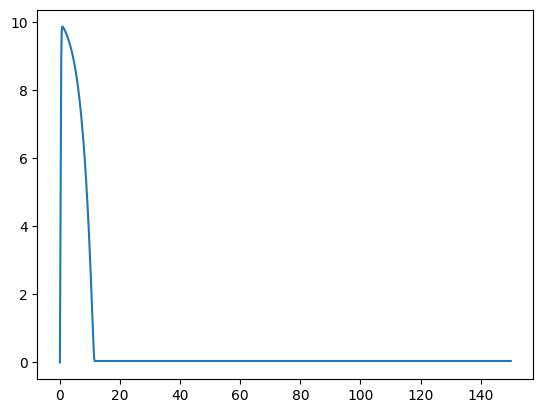

In [373]:
plt.plot(sol.t, C_dict["R_EX_glc__D_e"])

## Simple example

In [394]:
model_textbook = reframed.load_cbmodel("../models/e_coli_core.xml")

env = reframed.Environment.from_model(model_textbook)

ts = np.linspace(0, 6, 1000)
C = {"R_EX_glc__D_e":10,"R_BIOMASS_Ecoli_core_w_GAM":0.1,"R_EX_co2_e":0} 

kinetic_laws = {"R_EX_glc__D_e":KineticLaw("R_EX_glc__D_e",vmax=10,Km=5)}
external_rxns_fluxes = {}


with tqdm() as pbar:
    
    dynamic_system = dfba_ode.flux_predictions
    dynamic_system.pbar = pbar
    
    
    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=np.array(list(C.values())),
        t_eval=ts,
        rtol=1e-4,
        atol=1e-4,
        #max_step = 0.1,
        method='RK23',
        args=(C.keys(),
        model_textbook,
        kinetic_laws,
        env,"R_BIOMASS_Ecoli_core_w_GAM",external_rxns_fluxes)
    )

t = 6.000: : 110it [00:00, 252.36it/s]


Text(0, 0.5, 'Glucose')

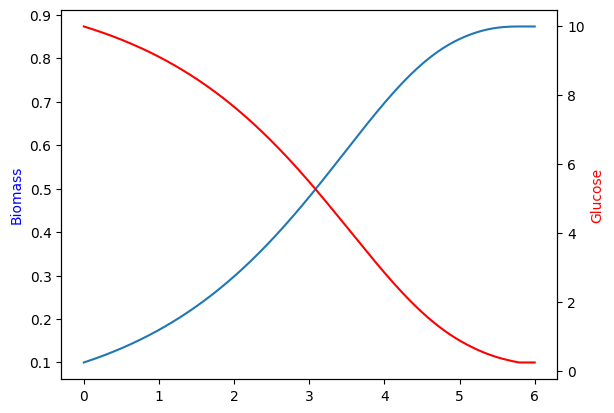

In [395]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y[1])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y[0], color='r')

ax.set_ylabel('Biomass', color='b')
ax2.set_ylabel('Glucose', color='r')

Text(0, 0.5, 'CO2 production')

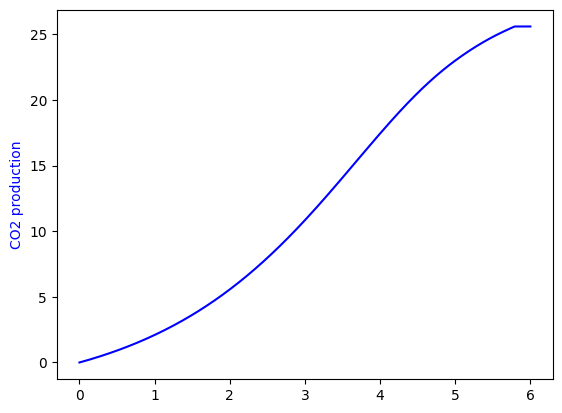

In [396]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y[2],color='b')
ax.set_ylabel('CO2 production', color='b')


In [399]:
model_textbook = reframed.load_cbmodel("../models/e_coli_core.xml")

env = reframed.Environment.from_model(model_textbook)
env["R_EX_o2_e"]=(-15,0)
ts = np.linspace(3, 10, 1000)
C = {"R_EX_glc__D_e":10.5,"R_BIOMASS_Ecoli_core_w_GAM":0.1,"R_EX_ac_e":0,"R_EX_o2_e":50} 

kinetic_laws = {"R_EX_glc__D_e":KineticLaw("R_EX_glc__D_e",vmax=10.5,Km=0.1),"R_EX_ac_e":KineticLaw("R_EX_ac_e",vmax=11.3,Km=0.1),"R_EX_o2_e":KineticLaw("R_EX_o2_e",vmax=15,Km=0.1)}
external_rxns_fluxes = {}

with tqdm() as pbar:
    
    dynamic_system = dfba_ode.flux_predictions
    dynamic_system.pbar = pbar
    
    
    sol = solve_ivp(
        fun=dynamic_system,
        t_span=(ts.min(), ts.max()),
        y0=np.array(list(C.values())),
        t_eval=ts,
        rtol=1e-4,
        atol=1e-4,
        #max_step = 0.1,
        method='RK23',
        args=(C.keys(),
        model_textbook,
        kinetic_laws,
        env,"R_BIOMASS_Ecoli_core_w_GAM",external_rxns_fluxes)
    )

t = 10.000: : 200it [00:00, 265.80it/s]


Text(0, 0.5, 'Glucose')

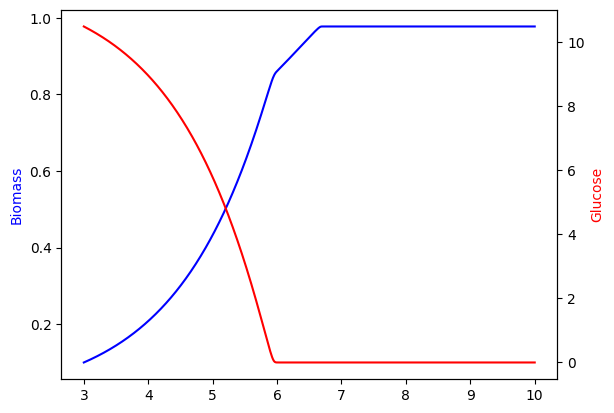

In [400]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y[1],color='b')
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y[0], color='r')

ax.set_ylabel('Biomass', color='b')
ax2.set_ylabel('Glucose', color='r')

Text(0, 0.5, 'acetate')

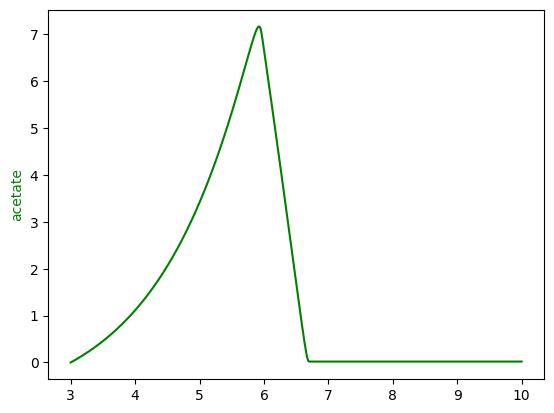

In [401]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y[2],'g')

ax.set_ylabel('acetate', color='g')
